# Practium Technische Heelkunde

Welkom bij het practicum van het vak KT2801 Technische Heelkunde. Tijdens dit practicum zullen jullie aan de hand van begeleidende teksten in deze Jupyter Notebook en de eerder door jullie uitgevoerde opdrachten een morfologisch model maken van het aangezicht. Er wordt gebruik gemaakt van een interactieve omgeving waarin snipets van Python code kunnen worden uitgevoerd. Je hebt hiervoor geen ervaring nodig met de programmeertaal.

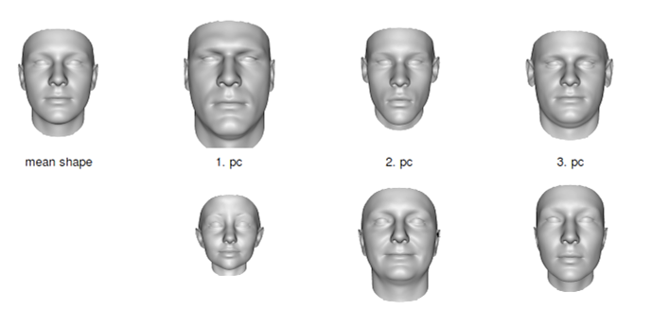

Probeer onderstaande code uit voeren door '▷' te drukken hierboven of 'shift + enter' in de cell.

In [ ]:
a = 'Hello World!'
print(a)

Gefeliciteerd! Je hebt een variable gedefinieerd 'a' en de inhoud van deze variabele, de tekst 'Hello World!', succesol geprint. De functie 'print()' heeft een input nodig. In dit geval was dat 'a'. Tijdens het coderen zul je regelmatig functies tegen komen die een input behoeven. De input lever je door deze uit te typen tussen de haakjes (). 

### Voor we beginnen...

Voer onderstaande code uit door wederom 'shift + enter' te klikken in de cell. Hiermee worden de benodigde functies voor de rest van het practicum beschikbaar gemaakt. Het kan even duren voordat dit klaar is. Wacht steeds tot de ene cell klaar is voordat je de volgende uitvoert.

In [ ]:
%%capture 
conda install mayavi

In [ ]:
%%capture 
conda install menpo3d

In [ ]:
%%capture
conda install vtk==8.2.0

In [ ]:
import menpo
import menpo3d
import matplotlib.pyplot as plt 
import numpy as np
import os
import vtk 
from tqdm import tqdm
%matplotlib inline

*Als je een import error krijgt voor menpo3d, installeer deze dan nogmaals door de tweede cell opnieuw uit te voeren en dan ook weer de laatste om deze te importeren. 

## Stap 1. Importeren van bestanden

Jullie gaan in dit practicum aan de slag met dezelfde 'meshes' waarmee jullie in de opdracht hebben gewerkt. De .obj bestanden die in de 'data' map staan (zie links) zijn het eindresultaat van het wrapping proces zoals doorlopen in Wrap3D. Open de map maar eens om te zien hoe de data georganiseerd is. In de 'data' map vind je de verschillende sets (1 t/m 5) en de gebruikte landmarks. De landmarks zullen later nog eens de revue passeren. 

We beginnen met het definiëren van de locatie waar de bestanden gevonden kunnen worden. Hier ga je zelf ook aan de slag met het coderen. In de onderstaande cell wordt de locatie van de bestanden gedefiniëerd als 'path_to_meshes'. Pas nu zelf de definitie aan naar de map waarin de meshes staan waar je eerder mee hebt gewerkt. Controleer of je dit goed hebt gedaan door 'path_to_meshes' te printen door deze als input uit typen in de print() functie. 

In [ ]:
#verander de inhoud voor path_to_meshes naar de locatie van je eigen set.
path_to_meshes= "data/set0/"

#vul je variabele in op de drie stippen in de print() functie hieronder om te controleren of dit goed is gelukt.
print(...)

Nu je de locatie van de bestanden heb gedefinieerd kunnen we deze gebruiken om de bestanden op te halen. We doen dit met onderstaande code. Voeg zelf de locatie van je bestanden, dus path_to_meshes, toe als input voor de functie op de plek van de drie stippen. De bestanden worden dan opgeslagen als 'meshes'.

In [ ]:
meshes = menpo3d.io.import_meshes(... + '*.obj')

Als het goed is bevat de variabele 'meshes' 5 bestanden. Controleer dit met de code hieronder. Volg de instructies achter de '#'.

In [ ]:
#controleer of je variabele 'meshes' bestaat uit 5 bestanden, vervang de drie stippen door meshes. 
print('Er zitten ' + str(len(...)) + ' bestanden in deze variabele.')

### Tussenstap...

Goed bezig, de eerste stap in het bouwen van je morfologisch model is gezet! We nemen nu een tussentap om te controleren of alles goed gaat. Dit doen we door één van de bestanden de je hebt opgeslagen in 'meshes' te exporteren en te openen in Wrap3D. Dit is dus een van de gezichten uit je eigen set en moet in Wrap3D overeenkomen. 

We exporteren een van deze bestanden naar de map output. Deze map bestaat nu nog niet dus we zullen deze ook eerst moeten maken.

Hieronder vind je de benodigde code om dit alles te doen met instructies wat te doen achter de '#'. Lees deze dus goed.  

In [ ]:
#deze functie maakt een nieuwe map, schrijf de naam van deze map uit op de plek van de drie stipjes.
folder_name = '...'
os.makedirs(folder_name)

In [ ]:
#deze functie exporteert een van de meshes naar de map 'output', vervang de drie stipje door het getal 3.
menpo3d.io.export_mesh(meshes[...], folder_name + '/controle_003.obj') 

Je hebt nu het vierde gezicht uit je set geëxporteerd naar de map 'output'. Open de map maar eens in het scherm links om te zien of dit goed is gegaan. Download vervolgens deze mesh en controleer of deze overeenkomt met het vierde gezicht uit je eigen set door beide bestanden te openen in Wrap3D. Gelukt?

## Stap 2. Constructie van morfologisch model

Je gaat nu echt aan de slag met het maken van het model. Dit is vrij eenvoudig te doen door onderstaande code uit te voeren. Je model wordt vervolgens opgeslagen in de variabele 'PCA_model'. Dit is handig, want je kunt deze vervolgens gebruiken om allerlei gegevens over je model op te halen. Deze zul je nodig hebben voor het voltooien van de opdracht. Voer onderstaande code uit. 

In [ ]:
#voer deze code uit, hiermee construeer je het morfologisch model.
PCA_model = menpo.model.PCAModel(meshes)

Je hebt nu van de set van 5 meshes waarmee je eerder hebt gewerkt een morfologisch model gemaakt. Dit aantal is wat laag om  een echt representatief model van het humane hoofd te maken, maar je kunt bijvoorbeeld wel het gemiddelde gezicht uit deze 5 meshes halen. Probeer het maar eens uit hieronder.  

In [ ]:
#voer deze code uit, hiermee sla je het gemiddelde op in de variabele 'mean_mesh'.
mean_mesh = PCA_model.mean()

De variable 'mean_mesh' bevat nu het gemiddelde gezicht uit de set van 5 meshes die je hebt gebruikt. Exporteer deze mesh naar de output map met onderstaande code. Vul de naam van je variabele in op de plek van de drie stippen. Bekijk vervolgens de map output en controleer of het gemiddelde uit deze 5 meshes hier in staat. Download dit bestand weer en bekijk deze in Wrap3D. 

In [ ]:
#vul de naam van je variabele in op de drie stippen.
menpo3d.io.export_mesh(..., 'mean_mesh.obj') 

## Stap 3. Toepassing van morfologisch model

Tijdens het college zijn een aantal toepassingen van een drie dimensionaal morfologisch model van anatomische structuren aan bod gekomen. Een daarvan is het synthetiseren van nieuwe vormen (van je anatomische structuur). Dit klinkt misschien wat vaag, maar hier ga je mee oefenen. Gebruik onderstaande code om drie willekeurige en dus mogelijk niet bestaande gezichten te synthetiseren. Volg hiervoor de instructies achter de '#'.

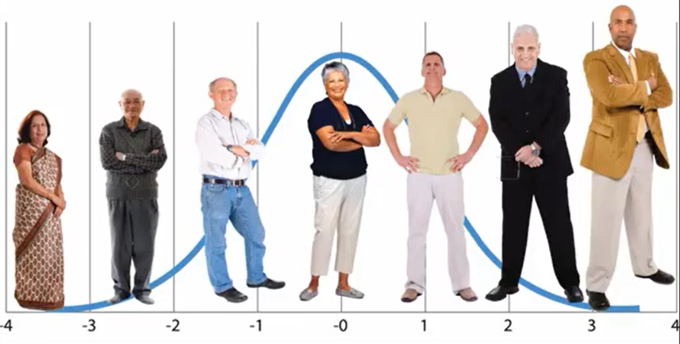

In [ ]:
#vul op de stippen het aantal synthetische gezichten in die je wilt vervaardigen uit je model, we houden het hier op 3.  
n_samples=...

In [ ]:
#met onderstaande code definieer je waar langs de normaal verdeling van je model je een sample wilt nemen, pas niks aan. 
cov_m = np.diag(np.reshape(PCA_model.eigenvalues,(PCA_model.n_comp,)))
synth_weights = np.random.multivariate_normal(np.zeros(PCA_model.eigenvalues.shape[0]), cov_m, n_samples)

Met onderstaande code genereer je de gezichten. Deze worden geëporteerd naar de output map. Download deze bestanden en bekijk deze eens in Wrap3D.

In [ ]:
#met onderstaande code genereer je de synthetische gezichten, deze worden geëxporteerd naar de output map, controleer dit. 
for i, synth_w in enumerate(tqdm(synth_weights)):
    synth_mesh = PCA_model.instance(synth_w)
    menpo3d.io.export_mesh(synth_mesh, os.path.join('output/','synth_{:03d}.obj'.format(i)), overwrite=True)

Probeer eens te bedenken wat mogelijke toepassingen zouden kunnen van de mogelijkheid om synthetische structuren te vervaardigen die morfologisch steeds iets anders is, maar wel binnen zo'n normaal verdeling vallen.  

Je kunt in theorie eindeloos veel gezichten maken, mocht je daar tijd voor hebben dan kun je dit uitproberen door verschillende aantallen in te vullen bij n_samples. Let wel, de hoeveelheid data die je in deze omgeving tot je beschikking hebt is beperkt. 

## Stap 4. Analyse van morfologisch model

Na het maken van het model en exploratie van wat je er mee kan, duiken we nu in de getallen. Principal component analyse (PCA) doet niks anders dan nieuwe assen definiëren voor je data punten op geleide van de richting van je variantie. De assen staan telkens loodrecht op elkaar. De eerste as, oftewel principal component 1 (PC1), is de as in je meerdimensionale assensysteem waarlangs je data punten het wijdst verspreid liggen. Deze as omvat dus het grootste aandeel van de totale variantie. Het aandeel van de variantie in je totale dataset die wordt beschreven door de individuele principal components (PCs) neemt gestaag af. 

Wees gerust, je hoeft de precieze berekeningen niet uit te kunnen voeren. Om meer inzicht te krijgen in waar dit over gaat kunnen we het beste naar de getallen kijken. De variabele 'PCA_model' bevat al deze gegevens. Een van de uitkomsten is dus het aandeel van de totale variantie voor elke principal component. Print onderstaande code eens uit en noteer de uitkomsten voor je eigen set.

In [ ]:
#definieer het het aantal components waar het model uit bestaat.
aantal_components = PCA_model.n_components

#vul de variabele met het aantal PCs in op de stippen in de print functie.
print('Dit model bestaat uit ' + str(...) + ' principal components.')

In [ ]:
#het aandeel van de totale variantie die wordt verklaart door de individuele principal components
for i in range(0, aantal_components):
    print('Principal component ' + str(i+1) + ' verklaart ' + str(np.round(PCA_model.eigenvalues_ratio()[i]*100,1)) + '%' + ' van de totale variantie')

Je kunt dit ook weergeven in een plot met onderstaande code. Let er hierbij op dat Python altijd bij 0 begint met tellen. 'Component number 0' komt dus overeen met principal component 1.  

In [ ]:
PCA_model.plot_eigenvalues_ratio()

## Stap 5. Opdrachten


Als je zover bent gekomen ben je al een heel eind. Indien je daar tijd voor hebt probeer dan in de laatste fase van dit practicum te kijken naar de bijhorende opdracht. In de data map vind je ook de landmarks voor gezichten. Download dit bestand samen met je eigen set van gezichten en importeer deze in Wrap3D. Koppel de landmarks aan de verschillende gezichten en exporteer de landmarks bestanden als ''3D-Point'. Met deze gegevens kun je verschillende antropometrische berekeningen doen, bijv. de gemiddelde afstand tussen de binnenste ooghoeken voor je set. 

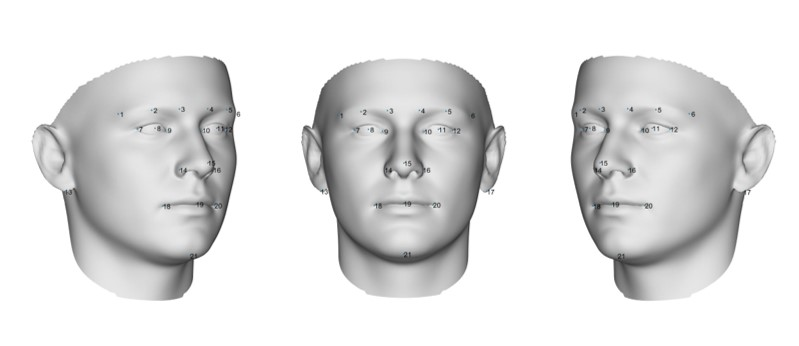

## Stap 6. Reflectie

Je bent aangekomen bij het einde van dit practicum. Sla alle benodigden gegevens voor de opdracht op en reflecteer op de stappen die je hebt genomen om tot dit punt te komen. Ga na bij je studiegenoten hoe ver zij zijn gekomen. 

Dit practicum heeft zich afgespeeld in deze interactieve omgeving, maar je hebt natuurlijk al heel wat werk verzet voordat je bij dit punt arriveerde. Denk terug aan de stappen die je hebt genomen in Wrap3D. Nu is het ook nog eens zo dat de 3D reconstructies al voor je klaar lagen. In feite zit er dus nog een stap voor, namelijk het vergaren van de data om de 3D reconstructies te vervaardigen van anatomische structuren. Denk hierbij aan segmentaties uit CT-scans of foto's met 3D camera's in een speciaal daarvoor opgezette omgeving. Het kost dus heel wat werk om tot dit eindresultaat te komen. Je zult in het vervolg van je opleiding en stages ongetwijfeld nog eens in aanraking komen met de stof uit dit vak.